## Moh Hardness Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The task is to use regression to predict the Mohs hardness of a mineral, given its properties.


### 2) Data Collection
The dataset (both train and test) was generated from a deep learning model trained on the Prediction of Mohs Hardness with Machine Learning dataset.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')

#### Show Top 5 Records

In [18]:
train_df.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [19]:
test_df.shape

(6939, 12)

Create a combined Dataset

In [24]:
# create a combined dataset made up of both test and train data
# form a target variable as well as dropping the traget column from the dataset
# create a variable holding the len of the training data set so as to be used to split the dataset during testing
train_df_len=len(train_df)
y=train_df['Hardness']
df=pd.concat([train_df,test_df],)
df=df.drop('Hardness', axis=1)
df.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481


#### Shape of the dataset

In [25]:
df.shape

(17346, 12)

###  Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [26]:
df.isna().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [27]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [28]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17346 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17346 non-null  int64  
 1   allelectrons_Total     17346 non-null  float64
 2   density_Total          17346 non-null  float64
 3   allelectrons_Average   17346 non-null  float64
 4   val_e_Average          17346 non-null  float64
 5   atomicweight_Average   17346 non-null  float64
 6   ionenergy_Average      17346 non-null  float64
 7   el_neg_chi_Average     17346 non-null  float64
 8   R_vdw_element_Average  17346 non-null  float64
 9   R_cov_element_Average  17346 non-null  float64
 10  zaratio_Average        17346 non-null  float64
 11  density_Average        17346 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.7 MB


### 3.4 Checking the number of unique values of each column

In [29]:
df.nunique()

id                       17346
allelectrons_Total         351
density_Total             1483
allelectrons_Average       777
val_e_Average              246
atomicweight_Average      1125
ionenergy_Average         1146
el_neg_chi_Average         950
R_vdw_element_Average      937
R_cov_element_Average      873
zaratio_Average           1025
density_Average            599
dtype: int64

### 3.5 Check statistics of data set

In [30]:
df.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,17346.00000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000
mean,8672.50000,127.416105,14.612423,17.182421,4.546814,37.873769,10.931589,2.607845,1.733961,0.946335,0.492679,2.140617
std,5007.50322,217.646048,17.240077,10.684067,0.687772,26.556198,1.396615,0.330136,0.191746,0.179732,0.062193,1.945274
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4336.25000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.528437,1.672500,0.865000,0.476095,0.813500
50%,8672.50000,100.000000,10.650000,12.600000,4.727273,26.203827,11.202760,2.706000,1.736000,0.918333,0.488550,1.351550
75%,13008.75000,130.000000,16.676996,22.000000,4.800000,48.719500,11.660488,2.805000,1.813333,0.983333,0.496070,2.780220
max,17345.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000


#### Insight
- From above description of data means are very volatile - between 2.60 and 8672.5;
- All standard deviations are volatile - between 0.3 and 5007.5;


### 3.7 Exploring Data

In [31]:
df.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

<Axes: >

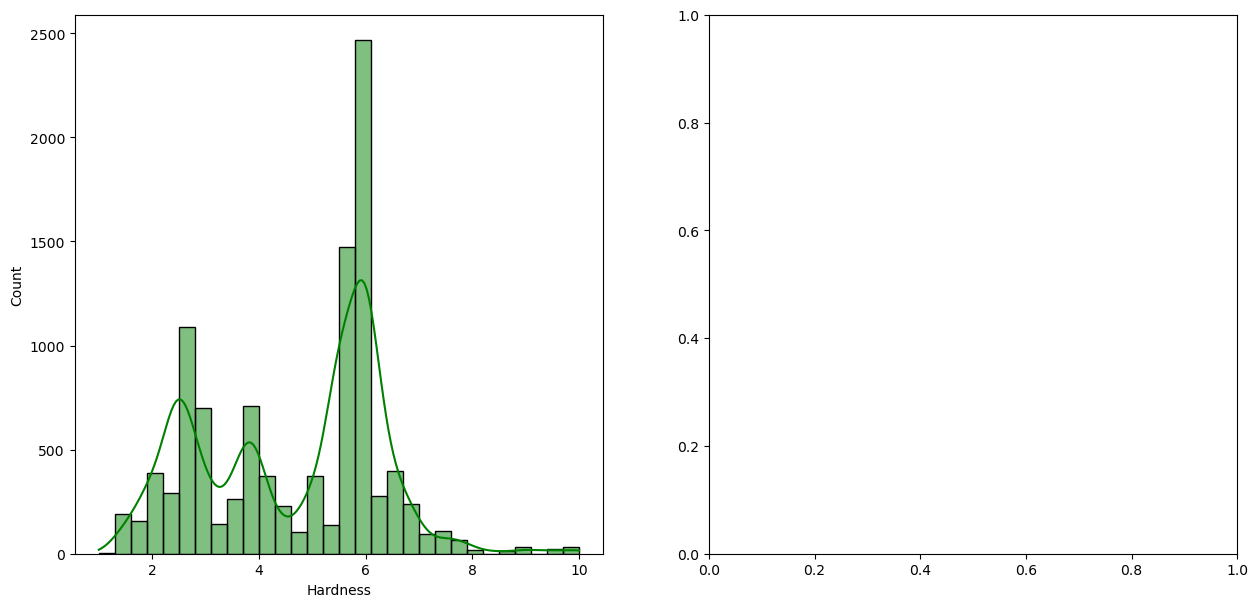

In [34]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=train_df,x='Hardness',bins=30,kde=True,color='g')
plt.subplot(122)


<Axes: >

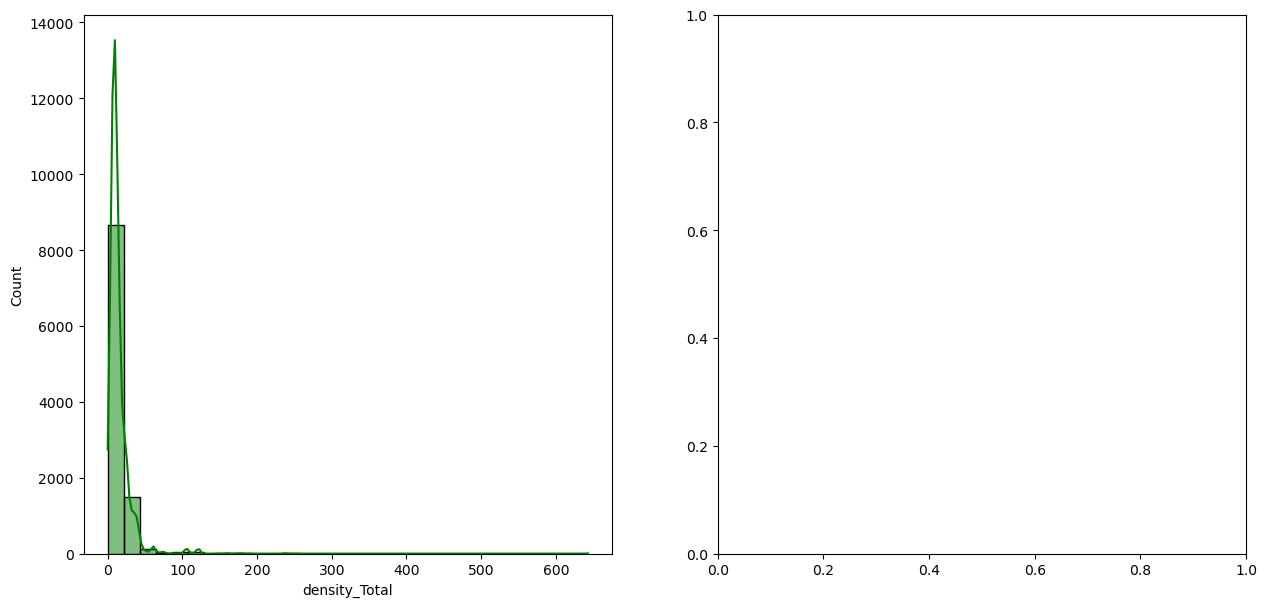

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=train_df,x='density_Total',bins=30,kde=True,color='g')
plt.subplot(122)


#####  Insights
- Alot of rocks have a total density between 0-50.
- Most rocks have a hardness rating of 5-6

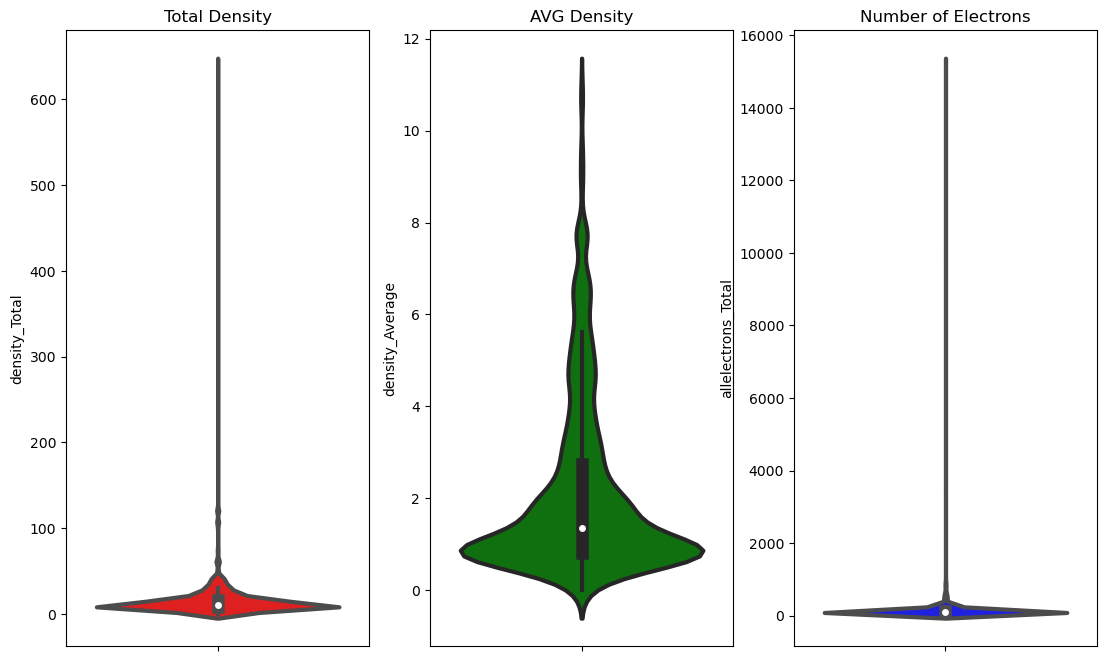

In [35]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Total Density')
sns.violinplot(y='density_Total',data=train_df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('AVG Density')
sns.violinplot(y='density_Average',data=train_df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Number of Electrons')
sns.violinplot(y='allelectrons_Total',data=train_df,color='blue',linewidth=3)
plt.show()

In [36]:
train_df.head(5)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


#### 4.4.6 CHECKING OUTLIERS

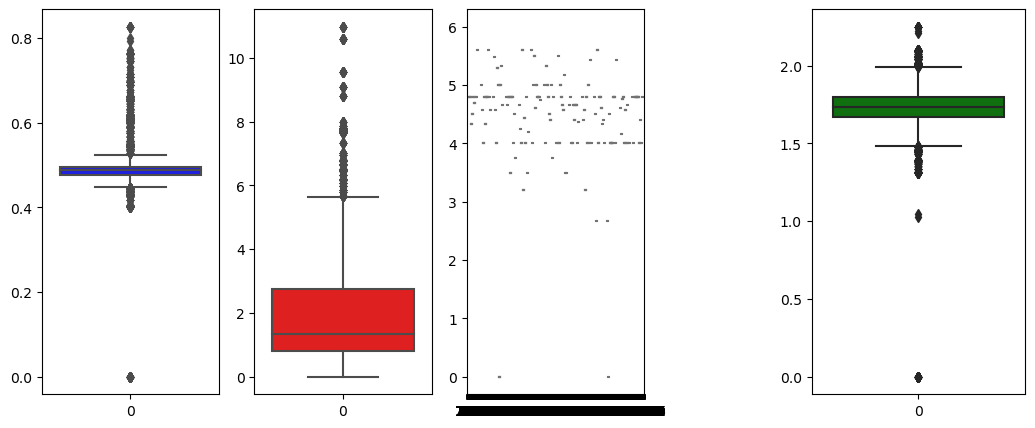

In [40]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(train_df['allelectrons_Total'],color='skyblue')
plt.subplot(142)
sns.boxplot(train_df['density_Total'],color='hotpink')
plt.subplot(143)
sns.boxplot(train_df['allelectrons_Average'],color='yellow')
plt.subplot(144)
sns.boxplot(train_df['val_e_Average'],color='gold')
plt.subplot(151)
sns.boxplot(train_df['atomicweight_Average'],color='purple')
plt.subplot(152)
sns.boxplot(train_df['ionenergy_Average'],color='magenta')
plt.subplot(153)
sns.boxplot(train_df['el_neg_chi_Average'],color='cyan')
plt.subplot(154)
sns.boxplot(train_df['R_vdw_element_Average'],color='green')
plt.subplot(161)
sns.boxplot(train_df['zaratio_Average'],color='blue')
plt.subplot(162)
sns.boxplot(train_df['density_Average'],color='red')
plt.subplot(163)

sns.boxplot(df['val_e_Average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

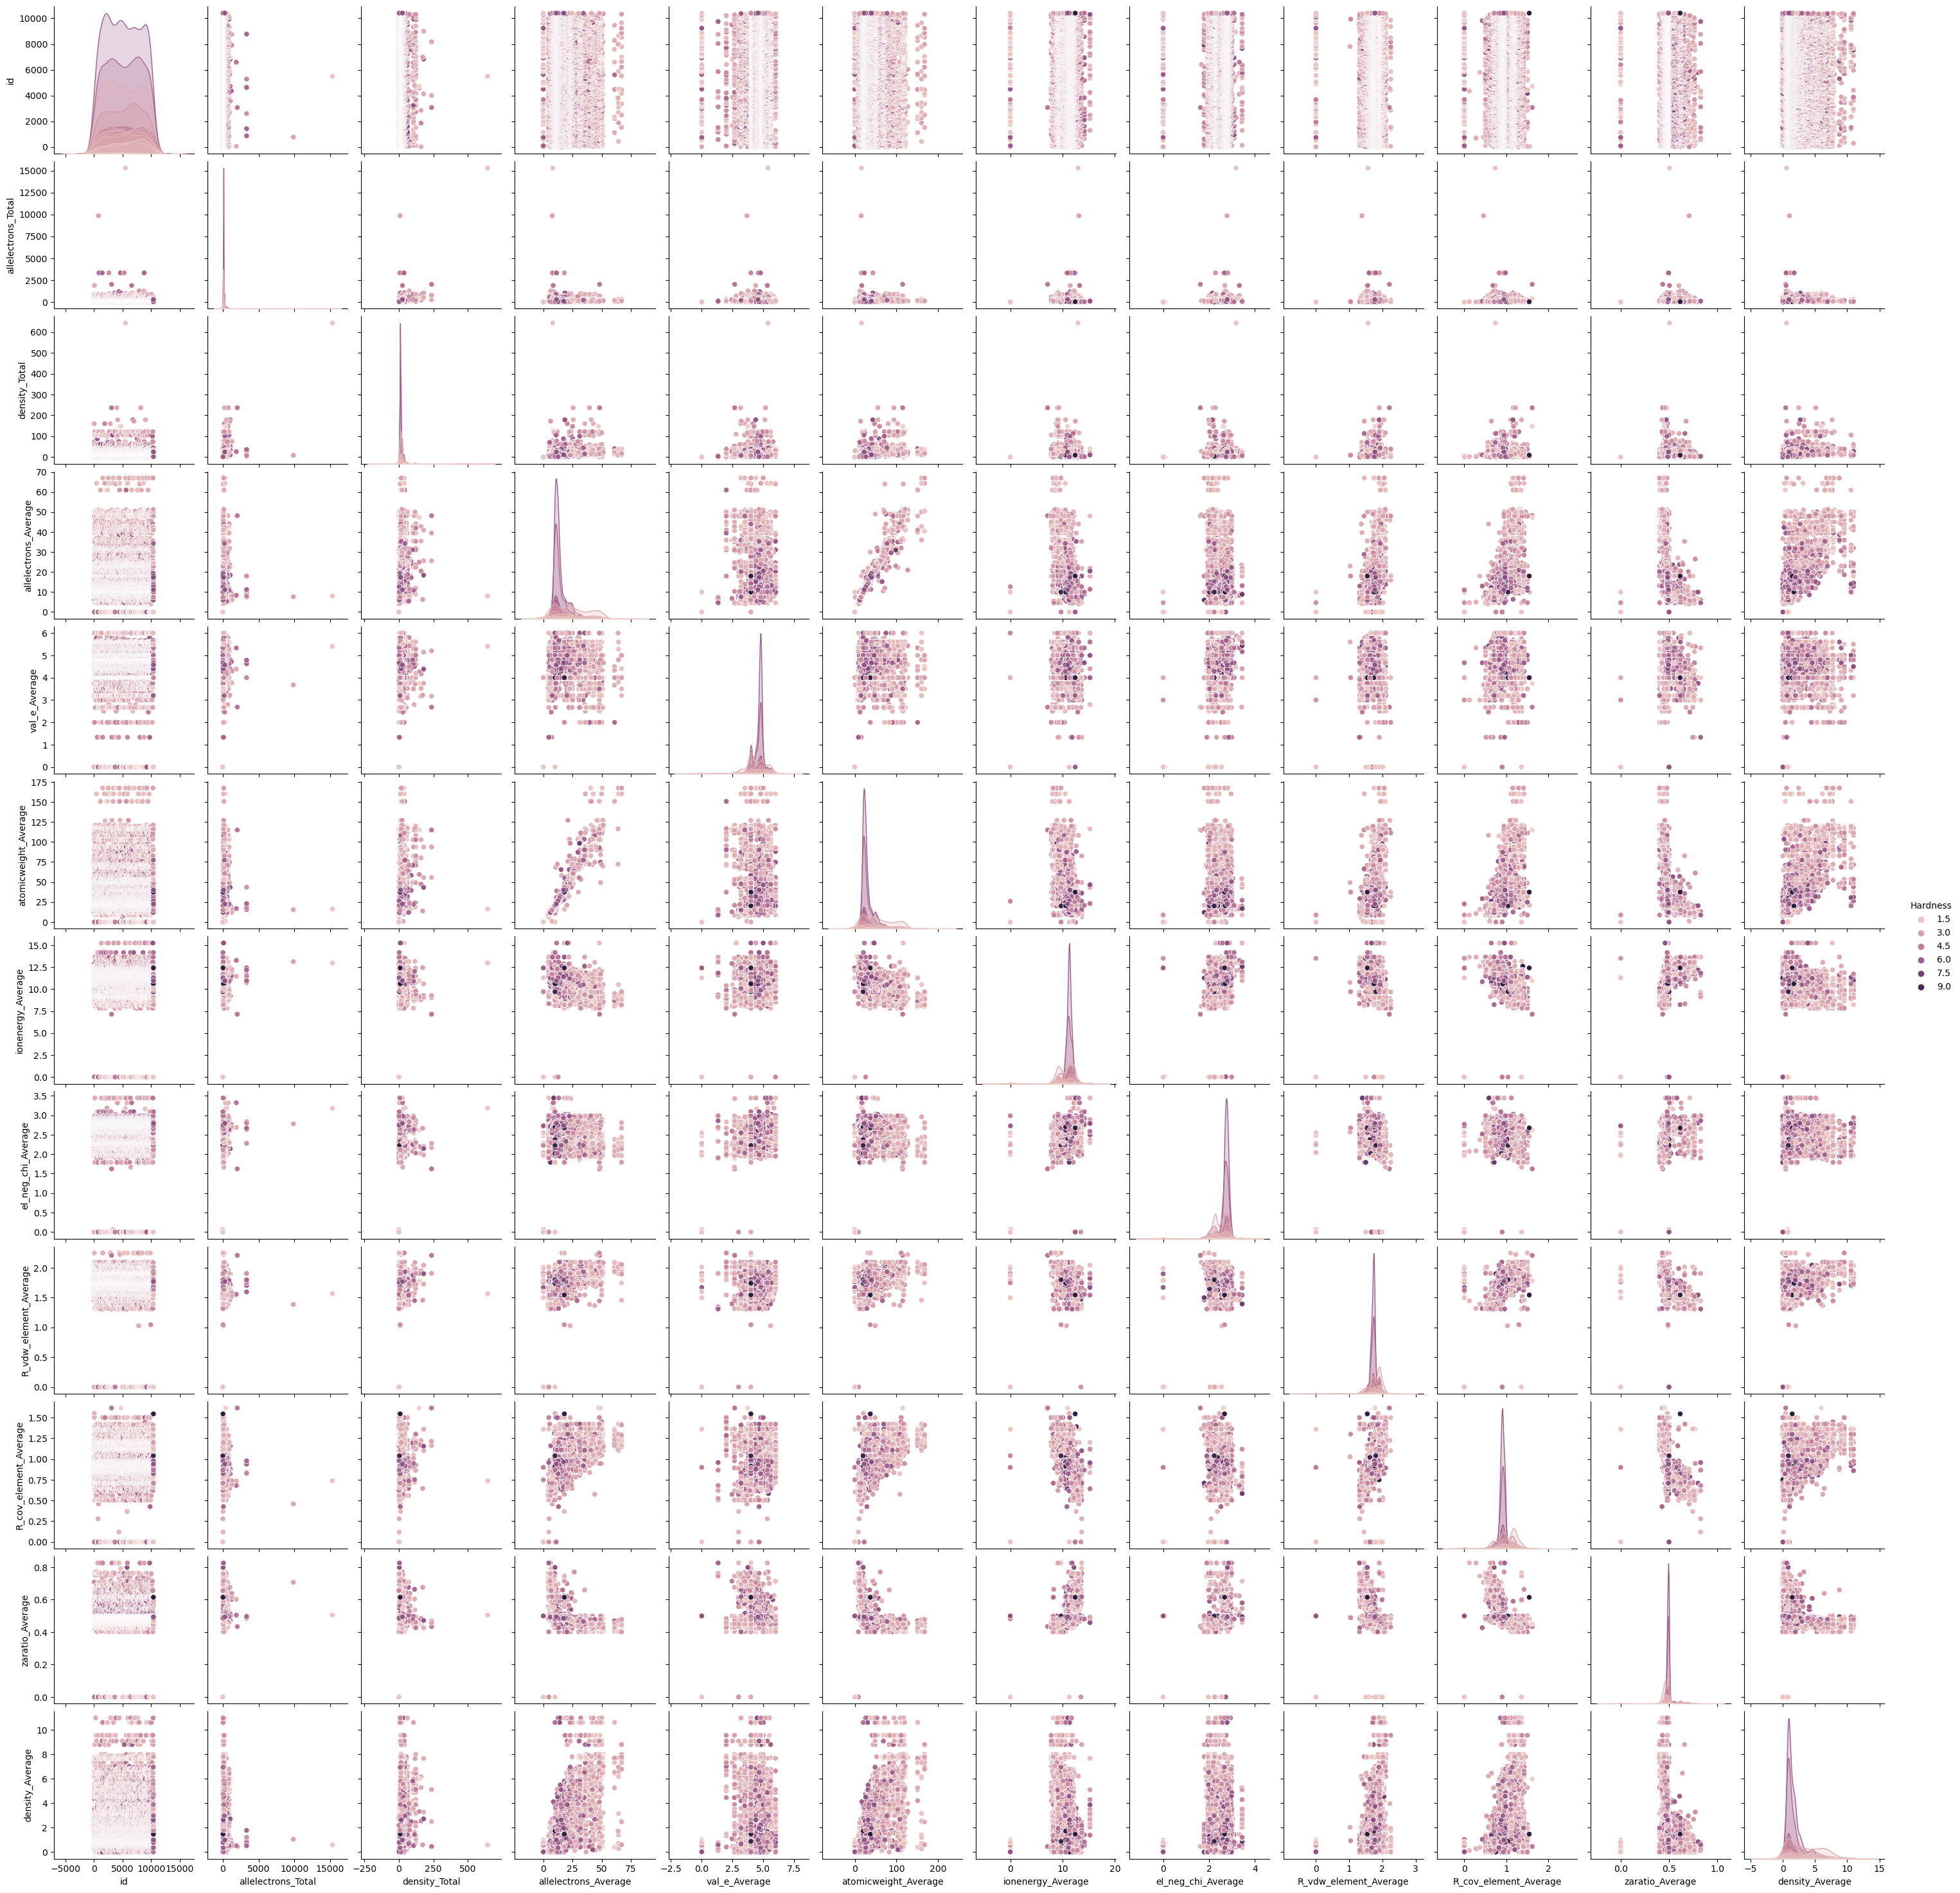

In [41]:
sns.pairplot(train_df,hue = 'Hardness')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.